In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv(R'C:\Users\user\Downloads\house_price.csv')

# Basic EDA
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

# Set upper and lower bounds
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# Trim outliers
df_trimmed_std = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]
lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)

df_trimmed_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]




                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk          

In [23]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_trimmed_iqr = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]


In [27]:
from scipy.stats import zscore

df['z_score'] = zscore(df['price_per_sqft'])

df_trimmed_zscore = df[df['z_score'].abs() < 3]
df = df.drop(columns='z_score')


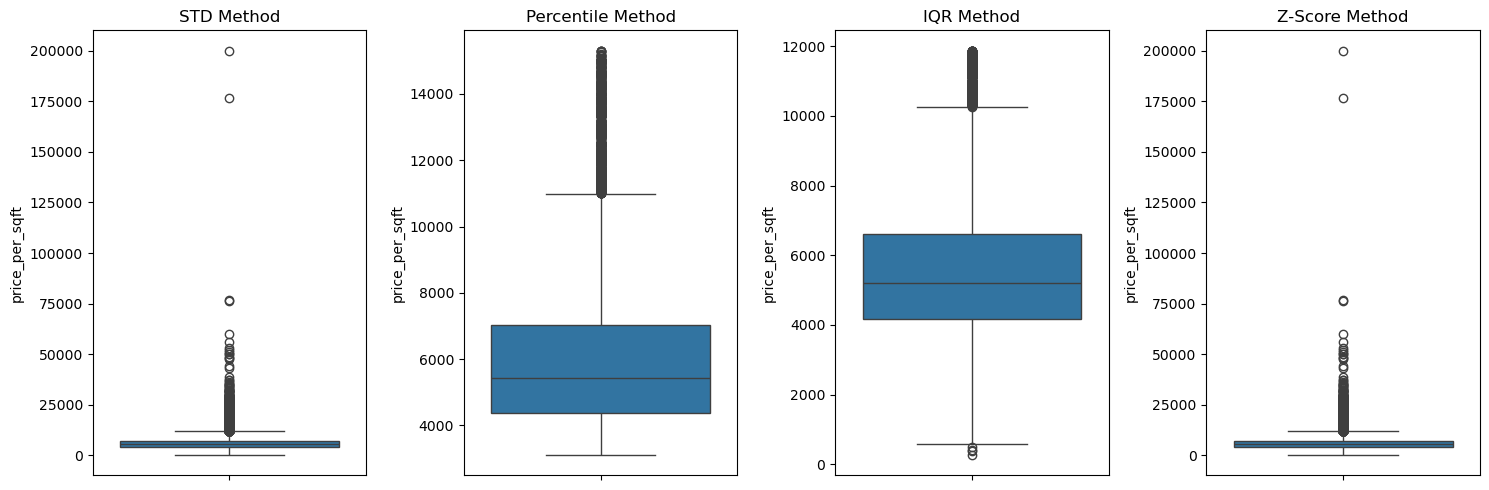

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
sns.boxplot(y=df_trimmed_std['price_per_sqft'])
plt.title('STD Method')

plt.subplot(1,4,2)
sns.boxplot(y=df_trimmed_percentile['price_per_sqft'])
plt.title('Percentile Method')

plt.subplot(1,4,3)
sns.boxplot(y=df_trimmed_iqr['price_per_sqft'])
plt.title('IQR Method')

plt.subplot(1,4,4)
sns.boxplot(y=df_trimmed_zscore['price_per_sqft'])
plt.title('Z-Score Method')

plt.tight_layout()
plt.show()


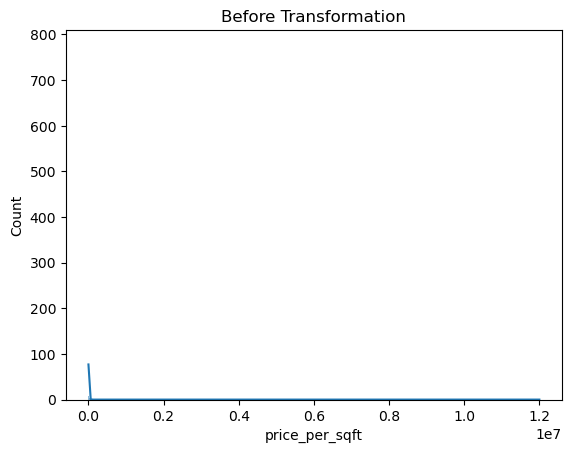

Skewness: 108.26875024325159
Kurtosis: 12090.633538860382


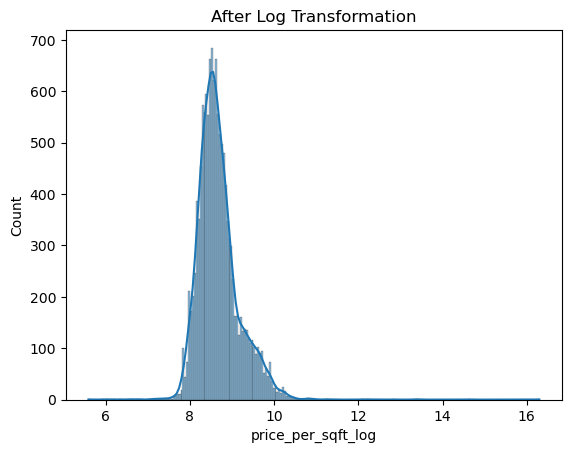

Skewness (log): 1.4003259019533636
Kurtosis (log): 9.203000543610957


In [36]:
from scipy.stats import skew, kurtosis
from scipy.stats import boxcox
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Before transformation
sns.histplot(df['price_per_sqft'], kde=True)
plt.title("Before Transformation")
plt.show()

print("Skewness:", skew(df['price_per_sqft']))
print("Kurtosis:", kurtosis(df['price_per_sqft']))

# Apply log transformation
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])

# After transformation
sns.histplot(df['price_per_sqft_log'], kde=True)
plt.title("After Log Transformation")
plt.show()

print("Skewness (log):", skew(df['price_per_sqft_log']))
print("Kurtosis (log):", kurtosis(df['price_per_sqft_log']))


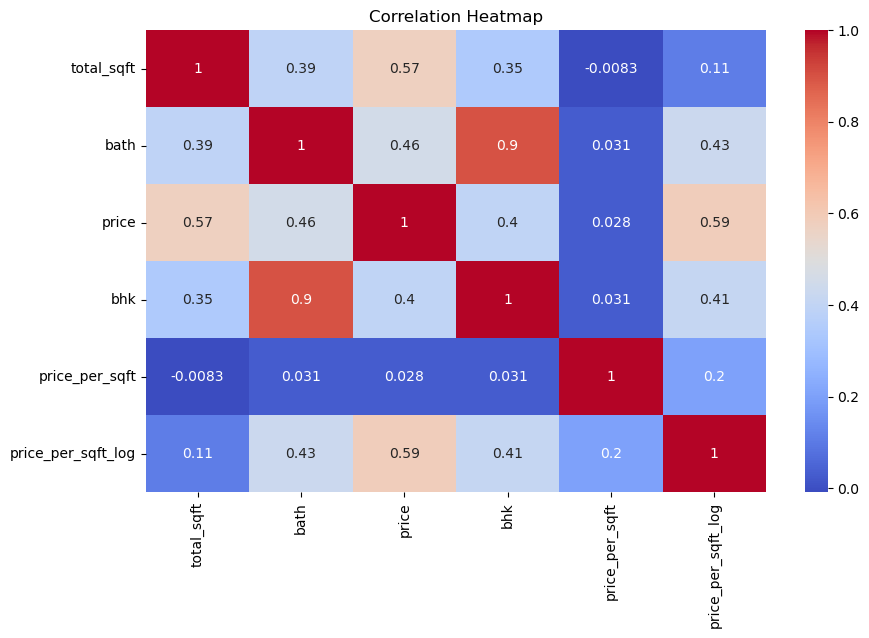

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

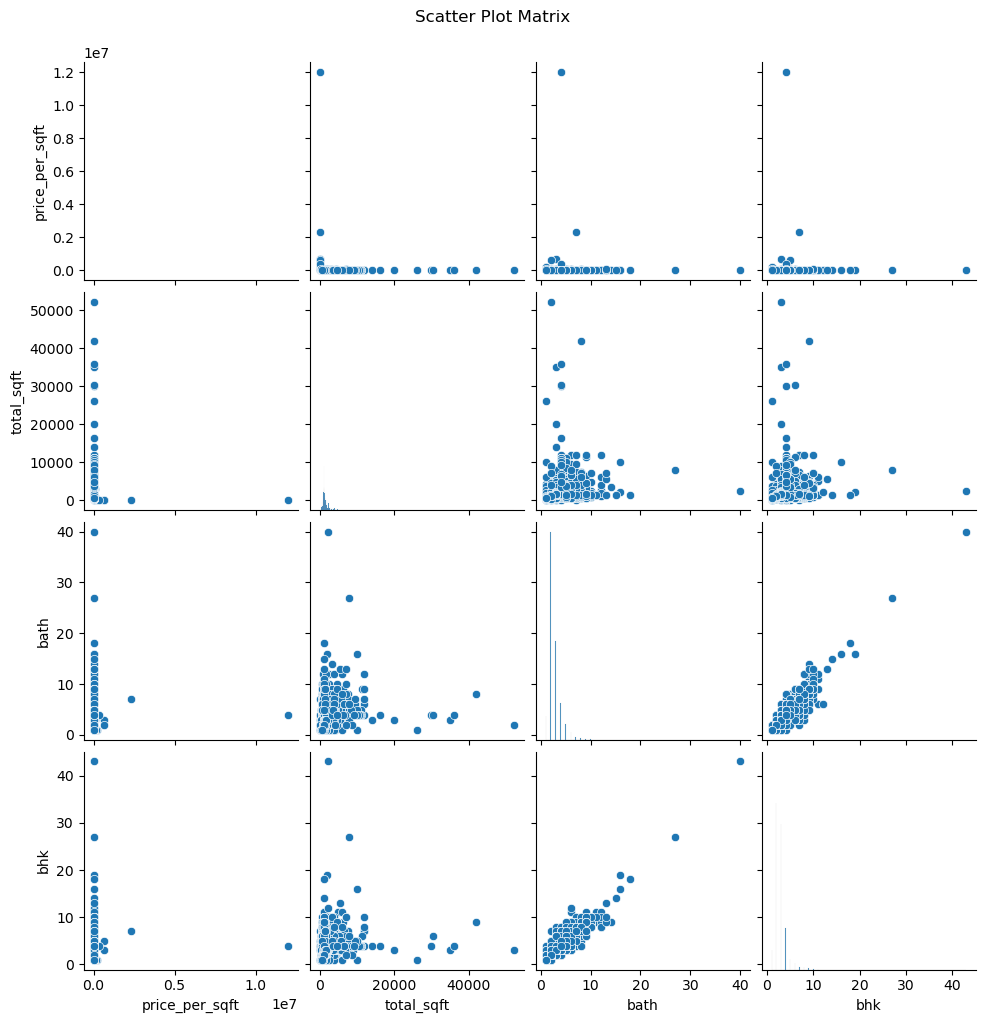

In [34]:
# Replace with actual numerical column names if different
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df[['price_per_sqft', 'total_sqft', 'bath', 'bhk']])
plt.suptitle("Scatter Plot Matrix", y=1.02)
plt.show()
